## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-007-004B-CNN-01 - MNIST Data Processor

## Part A - Load Data

In [1]:
import os

In [2]:
data_dir = os.path.abspath(os.path.join("..","..", "data", "MNIST"))
print(data_dir)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\data\MNIST


In [3]:
trainfilename = os.path.join(data_dir, "mnist_train.csv")
testfilename = os.path.join(data_dir, "mnist_test.csv")
pickledfilename = os.path.join(data_dir, "pickled_mnist.pkl")
print(trainfilename)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\data\MNIST\mnist_train.csv


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
train_data = np.loadtxt(trainfilename, delimiter=',')
test_data = np.loadtxt(testfilename, delimiter=',') 

In [6]:
fac = 255  *0.99 + 0.01
train_imgs = np.asfarray(train_data[:, 1:]) / fac
test_imgs = np.asfarray(test_data[:, 1:]) / fac
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [7]:
import numpy as np
lr = np.arange(10)
for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [8]:
lr = np.arange(no_of_different_labels)
# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)
# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

In [9]:
print(train_imgs.shape)

(60000, 784)


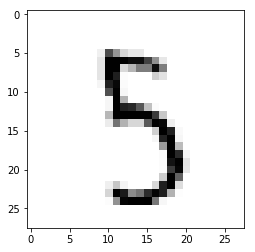

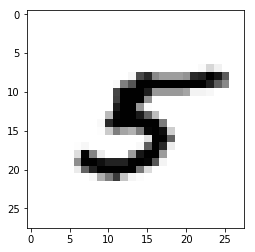

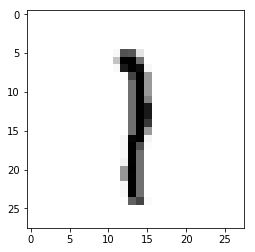

In [10]:
for i in range(5550, 5553):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [11]:
import pickle
with open(pickledfilename, "bw") as fh:
    data = (train_imgs, 
            test_imgs, 
            train_labels,
            test_labels,
            train_labels_one_hot,
            test_labels_one_hot)
    pickle.dump(data, fh)

In [12]:
import pickle
with open(pickledfilename, "br") as fh:
    data = pickle.load(fh)
    
train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [13]:
print('Train=>', train_imgs.shape)
print('Test==>', test_imgs.shape)

Train=> (60000, 784)
Test==> (10000, 784)


## Part B - Create Network function

In [14]:
import numpy as np
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)

## Part C - Create NeuralNetwork

In [15]:
class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ 
        A method to initialize the weight 
        matrices of the neural network
        """
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, 
                                         self.no_of_hidden_nodes))
        
    
    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can 
        be tuple, list or ndarray
        """
        
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.wih, 
                                input_vector)
        output_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.who, 
                                output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network \
              * (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp, 
                                           output_hidden.T)
        self.who += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, 
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * \
              (1.0 - output_hidden)
        self.wih += self.learning_rate \
                          * np.dot(tmp, input_vector.T)
        
        
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
            
    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm    
    def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [16]:
ANN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                    no_of_out_nodes = 10, 
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.1)

## Part D - Train NeuralNetwork

In [17]:
print('Train on %d images' % (len(train_imgs)))

Train on 60000 images


In [18]:
for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])

## Part E - Test NeuralNetwork

In [19]:
print('Test on %d images' % (len(test_imgs)))

Test on 10000 images


In [20]:
for i in range(5):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))

[7.] 7 0.9948274259444831
[2.] 2 0.8775458435499468
[1.] 1 0.9897675798027527
[0.] 0 0.9778025415488845
[4.] 4 0.937315694602287


## Part F - Results for NeuralNetwork

In [21]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
accruracy = corrects / ( corrects + wrongs)
print("Accuracy Train =>", float("{0:.4f}".format(accruracy)))

corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
accruracy = corrects / ( corrects + wrongs)
print("Accuracy Test ==>", float("{0:.4f}".format(accruracy)))

print('====================================================\n')

cm = ANN.confusion_matrix(train_imgs, train_labels)
print(cm)

print('====================================================\n')
for i in range(10):
    print('Digit:', i, 'Precision:', float("{0:.4f}".format(ANN.precision(i, cm))), 'Recall:' , float("{0:.4f}".format(ANN.recall(i, cm))))

Accuracy Train => 0.948
Accuracy Test ==> 0.9471

[[5811    3   72   25   16   42   50   13   20   36]
 [   0 6609   52   19   12   21   20   51   92    8]
 [   1   21 5455   42    8    8    4   46   10    5]
 [   6   42  108 5828    0  139    0   21  107   59]
 [   9   14   40    7 5416   27    9   38   19   61]
 [   2    3    2   45    1 4975   32    2   12    7]
 [  30    3   55   21   60   68 5753    4   36    1]
 [   1    7   53   34    8    8    0 5881    5   31]
 [  43   19  104   57    2   59   50   20 5432   23]
 [  20   21   17   53  319   74    0  189  118 5718]]

Digit: 0 Precision: 0.9811 Recall: 0.9545
Digit: 1 Precision: 0.9803 Recall: 0.9601
Digit: 2 Precision: 0.9156 Recall: 0.9741
Digit: 3 Precision: 0.9506 Recall: 0.9236
Digit: 4 Precision: 0.9271 Recall: 0.9603
Digit: 5 Precision: 0.9177 Recall: 0.9791
Digit: 6 Precision: 0.9721 Recall: 0.9539
Digit: 7 Precision: 0.9387 Recall: 0.9756
Digit: 8 Precision: 0.9284 Recall: 0.9351
Digit: 9 Precision: 0.9612 Recall: 0.875

## Part G - Run next NeuralNetwork

In [22]:
epochs = 5
NN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                   no_of_out_nodes = 10, 
                   no_of_hidden_nodes = 100, 
                   learning_rate = 0.1
                  )

for epoch in range(epochs): 
    print('====================================================') 
    print('Epoch:', epoch)
    print('====================================================')
    for i in range(len(train_imgs)):
        NN.train(train_imgs[i], train_labels_one_hot[i])
  
    corrects, wrongs = NN.evaluate(train_imgs, train_labels)
    accruracy = corrects / ( corrects + wrongs)
    print('Accuracy Train=>', float("{0:.4f}".format(accruracy)))
    
    corrects, wrongs = NN.evaluate(test_imgs, test_labels)
    accruracy = corrects / ( corrects + wrongs)
    print('Accuracy Test==>', float("{0:.4f}".format(accruracy)))
    print('====================================================\n')

Epoch: 0
Accruracy Train=> 0.9457
Accruracy Test==> 0.9462

Epoch: 1
Accruracy Train=> 0.9607
Accruracy Test==> 0.956

Epoch: 2
Accruracy Train=> 0.9684
Accruracy Test==> 0.9603

Epoch: 3
Accruracy Train=> 0.9736
Accruracy Test==> 0.963

Epoch: 4
Accruracy Train=> 0.9726
Accruracy Test==> 0.9613



## Done

In [23]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-21 09:12:56.605364
